In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/TrueCue/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/TrueCue


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Bar charts of the number of countries in each '14-day new case rate' group over time
Countries with a population over 5M

In [ ]:
df=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

df_pvt=df.pivot(index='date', columns='iso_code', values='new_cases').fillna(0.)
df_pvt.tail()

#sorted list of countries with a population over 5M
ctries=df[df.date=='2020-10-16'][df.population>=5000000][['iso_code', 'population']].sort_values('population', ascending=False).iso_code.to_list()[1:]
ctries[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


['CHN', 'IND', 'USA', 'IDN', 'PAK', 'BRA', 'NGA', 'BGD', 'RUS', 'MEX']

In [ ]:
df_pvt[ctries].tail()

iso_code,CHN,IND,USA,IDN,PAK,BRA,NGA,BGD,RUS,MEX,JPN,ETH,PHL,EGY,VNM,COD,TUR,IRN,DEU,THA,GBR,FRA,ITA,TZA,ZAF,MMR,KEN,KOR,COL,ESP,UGA,ARG,DZA,SDN,UKR,IRQ,AFG,POL,CAN,MAR,...,HTI,CUB,SSD,DOM,CZE,GRC,JOR,PRT,AZE,SWE,HND,ARE,HUN,TJK,BLR,AUT,PNG,ISR,CHE,TGO,SLE,LAO,PRY,BGR,LBY,LBN,SRB,NIC,KGZ,SLV,SGP,DNK,FIN,COG,SVK,NOR,OMN,PSE,CRI,LBR
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-15,11.0,67708.0,59386.0,4127.0,755.0,27235.0,179.0,1684.0,14231.0,2640.0,570.0,712.0,1823.0,128.0,9.0,63.0,1671.0,4830.0,6638.0,13.0,19724.0,22591.0,7332.0,0.0,1877.0,888.0,604.0,99.0,6061.0,13318.0,124.0,14932.0,185.0,0.0,5590.0,3857.0,32.0,6526.0,2506.0,3387.0,...,21.0,18.0,0.0,654.0,9543.0,435.0,2423.0,2072.0,369.0,970.0,606.0,1431.0,950.0,39.0,597.0,1606.0,3.0,1979.0,2724.0,11.0,6.0,0.0,648.0,819.0,836.0,1377.0,245.0,0.0,388.0,286.0,5.0,492.0,204.0,0.0,1410.0,152.0,563.0,532.0,1542.0,1.0
2020-10-16,36.0,63371.0,63785.0,4411.0,659.0,28523.0,0.0,1600.0,13754.0,1470.0,721.0,739.0,2162.0,118.0,2.0,35.0,1693.0,4616.0,7334.0,4.0,18978.0,30621.0,8803.0,0.0,1770.0,1026.0,602.0,47.0,6823.0,15186.0,48.0,17096.0,193.0,0.0,5062.0,3587.0,0.0,8099.0,2345.0,3317.0,...,17.0,27.0,9.0,404.0,9720.0,452.0,2459.0,2101.0,530.0,596.0,631.0,1398.0,1293.0,38.0,613.0,1396.0,0.0,948.0,2690.0,13.0,8.0,0.0,751.0,914.0,855.0,1499.0,203.0,0.0,431.0,295.0,3.0,430.0,291.0,0.0,1929.0,162.0,520.0,442.0,1372.0,2.0
2020-10-17,20.0,62212.0,70256.0,4301.0,575.0,30914.0,360.0,1527.0,15150.0,380.0,632.0,665.0,3052.0,126.0,0.0,30.0,1812.0,4552.0,7830.0,10.0,15635.0,25086.0,10009.0,0.0,2019.0,1137.0,437.0,73.0,8372.0,0.0,217.0,16546.0,211.0,0.0,5992.0,3501.0,47.0,7705.0,2374.0,3498.0,...,0.0,56.0,10.0,384.0,11102.0,503.0,1539.0,2608.0,509.0,0.0,602.0,1412.0,1791.0,40.0,658.0,1691.0,0.0,1695.0,3087.0,31.0,2.0,0.0,886.0,998.0,1169.0,1368.0,265.0,0.0,470.0,204.0,9.0,418.0,139.0,0.0,2075.0,183.0,0.0,397.0,1196.0,3.0
2020-10-18,30.0,61871.0,56611.0,4301.0,567.0,24062.0,113.0,1209.0,14922.0,2800.0,593.0,600.0,2588.0,138.0,2.0,6.0,1723.0,4103.0,5587.0,7.0,16171.0,32427.0,10925.0,0.0,1928.0,1387.0,616.0,91.0,7017.0,0.0,121.0,13510.0,215.0,0.0,6410.0,3221.0,68.0,9622.0,2215.0,3763.0,...,0.0,52.0,0.0,475.0,8715.0,482.0,1505.0,2153.0,528.0,0.0,903.0,1538.0,1474.0,41.0,0.0,2040.0,3.0,936.0,0.0,22.0,2.0,0.0,533.0,603.0,0.0,1171.0,227.0,0.0,0.0,191.0,3.0,500.0,0.0,0.0,1968.0,0.0,0.0,312.0,1166.0,0.0
2020-10-19,17.0,55722.0,47843.0,4105.0,433.0,10982.0,133.0,1274.0,15099.0,1320.0,471.0,703.0,2280.0,127.0,8.0,46.0,1815.0,3890.0,4325.0,5.0,16981.0,29837.0,11705.0,0.0,1662.0,1150.0,685.0,76.0,7201.0,0.0,135.0,10561.0,199.0,0.0,9997.0,3110.0,59.0,8536.0,1827.0,2721.0,...,0.0,50.0,25.0,422.0,5058.0,438.0,1520.0,1856.0,647.0,0.0,831.0,1215.0,1478.0,38.0,1306.0,1062.0,0.0,1014.0,195.0,8.0,3.0,0.0,709.0,395.0,945.0,1002.0,214.0,0.0,1036.0,210.0,7.0,451.0,291.0,0.0,1567.0,0.0,1657.0,389.0,0.0,0.0


In [ ]:
df_14_day=pd.DataFrame()
for col in df_pvt[ctries].columns:
  df_14_day[col]=df_pvt[col].rolling(window=14).sum()

df_14_day.fillna(0., inplace=True)

for col in df_14_day.columns:
  popn=(df.loc[(df.date=='2020-10-01') & (df.iso_code==col), 'population']/100000).values
  if len(popn) > 0:
    df_14_day[col]=df_14_day[col]/popn
  else:
    print (col)

df_14_day = df_14_day.T
df_14_day.head()

,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,...,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19
CHN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004099,0.002223,0.002223,0.002223,0.00132,0.002501,0.010908,0.012228,0.022719,0.032446,0.039185,0.057180,0.087819,0.134021,0.188700,0.310493,0.412346,0.533237,0.670523,0.814897,0.985393,1.179443,1.393849,1.653137,1.905339,2.106892,2.313725,...,0.021955,0.021746,0.021468,0.021191,0.020982,0.021191,0.021468,0.020635,0.021399,0.020843,0.021399,0.021607,0.020982,0.021677,0.021468,0.020635,0.020565,0.020009,0.019870,0.019870,0.019801,0.019315,0.018967,0.019176,0.018828,0.018064,0.018828,0.018620,0.019454,0.021121,0.021955,0.022372,0.022858,0.022580,0.022927,0.023692,0.023483,0.023692,0.024386,0.023831
IND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000072,0.000072,0.000072,0.000145,0.000145,0.000217,0.000217,0.000217,0.000217,0.000217,...,83.740966,85.138425,86.667261,87.798489,88.781022,89.787396,90.640002,91.655288,92.603329,93.103690,93.246660,92.968328,92.915719,92.454924,91.786303,91.025508,90.140873,89.722613,89.005152,88.047184,87.347838,86.545450,85.462844,84.458427,83.242779,82.335608,81.334452,80.515759,79.937210,78.809967,77.933883,76.903669,75.784977,74.680125,73.450926,72.065930,70.753398,69.502388,68.490942,67.134424
USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000302,0.000302,0.000302,0.000302,0.000604,0.000604,0.001511,0.001511,0.001511,0.001511,0.001813,0.002115,0.002417,0.003323,0.003021,0.003021,0.003323,0.003323,0.003021,...,162.489335,159.950987,159.469722,158.465802,157.949190,158.248583,160.313219,156.036517,158.247375,157.986954,156.825332,159.634071,168.366025,171.745152,173.558733,175.584699,177.684984,179.058991,179.777112,179.220319,176.665657,181.917578,182.281322,183.568925,186.700018,185.204259,181.443564,182.880109,185.977365,189.780053,190.707236,193.396943,195.617167,198.231949,201.102017,206.359981,212.104346,216.873190,218.671363,222.581302
IDN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.785474,16.202988,16.471338,16.657428,16.937842,17.083351,17.350969,17.675622,17.680374,17.907777,18.288000,18.487252,18.961068,19.335807,19.759171,20.041779,20.438820,20.686330,20.777365,20.911905,21.092877,21.210234,21.407292,21.563037,21.504176,21.505272,21.302731,21.297247,21.323935,21.402905,21.136383,21.063263,21.291031,21.202556,21.167459,21.110060,21.196707,21.190857,21.298343,21.339656
PAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.361

In [ ]:
df_14_day.loc['CHN']

2019-12-31    0.000000
2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.000000
                ...   
2020-10-15    0.023692
2020-10-16    0.023483
2020-10-17    0.023692
2020-10-18    0.024386
2020-10-19    0.023831
Name: CHN, Length: 294, dtype: float64

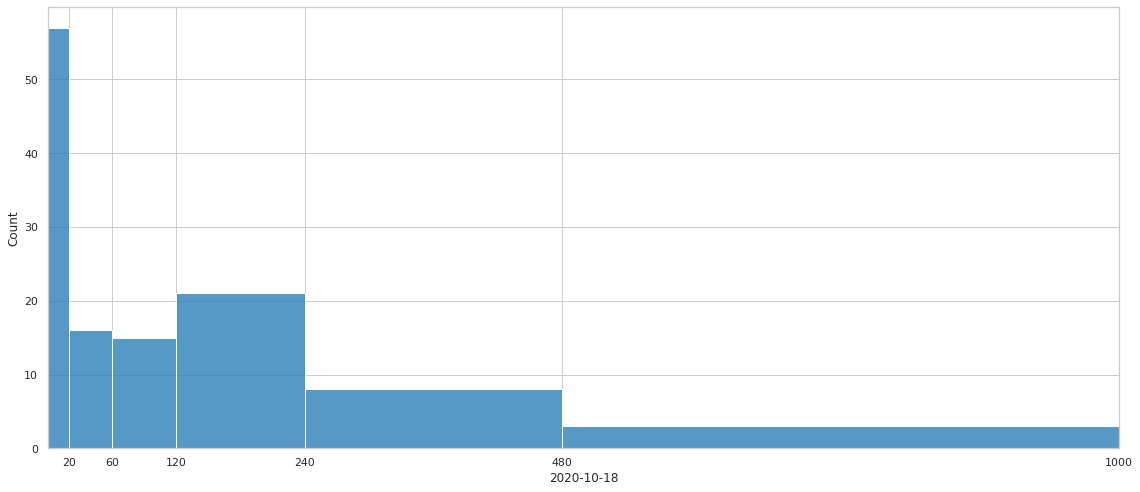

In [ ]:
# Histogram
fig = plt.figure(figsize=(16,7))
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.histplot(df_14_day['2020-10-18'], bins=[0,20,60,120,240,480,1000])
plt.xticks([20,60,120,240,480,1000])
plt.xlim([0,1000])
plt.tight_layout();

In [ ]:
def allocate_to_groups(x):
  if x<20:
    return '<20'
  elif x<60:
    return '20-59.9'
  elif x<120:
   return '60-119.9'
  elif x<240:
    return '120-239.9'
  elif x<480:
    return '240-479.9'
  return '>480'

In [ ]:
date=df_14_day.columns[-1]
day_df=pd.DataFrame(df_14_day[date])
day_df['group']=day_df[date].apply(lambda x: allocate_to_groups(x))
day_df[day_df.group=='>480']

,2020-10-19,group
NLD,539.747216,>480
BEL,702.611717,>480
CZE,853.853335,>480


In [ ]:
day_df.loc['ESP']

2020-10-19      263.391
group         240-479.9
Name: ESP, dtype: object

# Daily barplots

In [ ]:
for date in df_14_day.columns[[-i-1 for i in range((pd.to_datetime(df_14_day.columns[-1])-pd.to_datetime('2020-04-30')).days)][::-1]]:
#for date in ['2020-05-19']:

  day_df=pd.DataFrame(df_14_day[date])
  day_df['group']=day_df[date].apply(lambda x: allocate_to_groups(x))

  fig, ax = plt.subplots(figsize=(10, 6))
  sns.set_context('talk')
  sns.set_style('whitegrid')
  plot=sns.barplot(x=['<20','20-59.9','60-119.9','120-239.9','240-479.9','>480'], 
                   y=(list(day_df.group.value_counts().values)+[0, 0])[:6], 
                   palette=['lemonchiffon','yellow','orange','sandybrown','brown','red'])
  
  for rect in plot.patches:
    height = rect.get_height().astype(int)
    ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  ax.annotate('{}'.format(date), xy=(4,103))

  plt.title('Countries in each group of COVID19 new cases rate')
  plt.ylabel('Number of countries')
  plt.xlabel('\n14-day COVID19 case notification rate per 100 000 population')
  plt.ylim(0,110)
  plt.tight_layout()
  plt.savefig('./world_cartogram/pngs_bar/'+date, dpi=150)
  if date==df_14_day.columns[-1]: plt.show()
  plt.close();

## Make 'gif'

In [ ]:
!pip install pygifsicle 
!apt install gifsicle

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gifsicle is already the newest version (1.91-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
import os
import imageio
from pygifsicle import optimize

In [ ]:
png_dir = '/content/drive/My Drive/TrueCue/world_cartogram/pngs_bar/'
images = []

for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

imageio.mimwrite('./world_cartogram/bar.gif', images, format='.gif', fps=10, loop=1)
optimize('./world_cartogram/bar.gif') 